<h2 align="center">AtliQ Hotels Data Analysis Project<h2>

In [1]:
import pandas as pd

***
### ==> 1. Data Import and Data Exploration
***

### Datasets
We have 5 csv file 

   - dim_date.csv  
   - dim_hotels.csv
   - dim_rooms.csv
   - fact_aggregated_bookings
   - fact_bookings.csv

**Read bookings data in a datagrame**

In [2]:
fact_bookings = pd.read_csv("D:/BC/Python/AtliQ Grands/data/fact_bookings.csv")

**Explore bookings data**

In [3]:
fact_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [4]:
fact_bookings.shape

(134590, 12)

In [5]:
fact_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [6]:
fact_bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [7]:
fact_bookings.booking_platform.value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

<Axes: xlabel='booking_platform'>

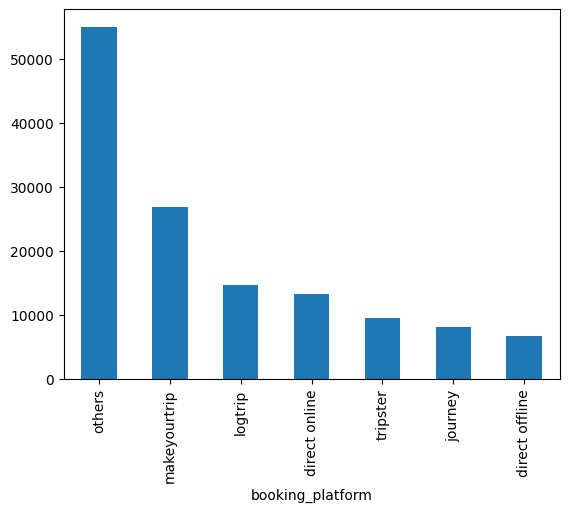

In [8]:
fact_bookings.booking_platform.value_counts().plot(kind = "bar")

In [9]:
fact_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


**Read rest of the files**

In [10]:
dim_date = pd.read_csv("D:/BC/Python/AtliQ Grands/data/dim_date.csv")
dim_hotels = pd.read_csv("D:/BC/Python/AtliQ Grands/data/dim_hotels.csv")
dim_rooms = pd.read_csv("D:/BC/Python/AtliQ Grands/data/dim_rooms.csv")
fact_agg_bookings = pd.read_csv("D:/BC/Python/AtliQ Grands/data/fact_aggregated_bookings.csv")

In [11]:
dim_hotels.shape

(25, 4)

In [12]:
dim_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [13]:
dim_hotels.category.value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

<Axes: xlabel='city'>

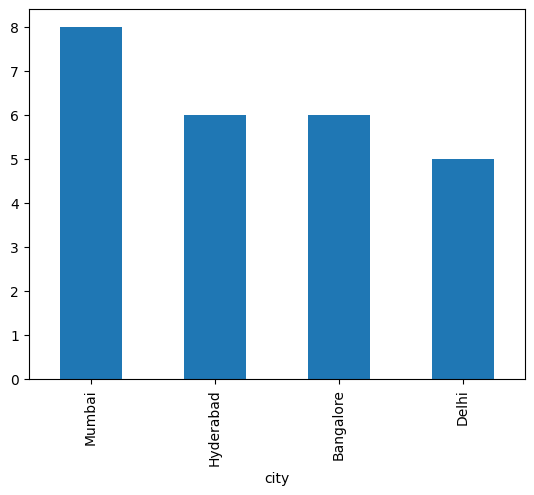

In [14]:
dim_hotels.city.value_counts().plot(kind = 'bar')

In [15]:
fact_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0


**Problem-1. Find out unique property ids in aggregate bookings dataset**

In [16]:
fact_agg_bookings.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560])

**Problem-2. Find out total bookings per property_id**

In [17]:
fact_agg_bookings.groupby("property_id").successful_bookings.sum().sort_values(ascending = False)

property_id
16559    7338
18562    7333
16563    7211
18560    6638
18561    6458
17563    6337
17559    6142
19560    6079
17560    6013
19562    5812
19561    5736
19563    5413
18559    5256
17561    5183
17558    5053
16562    4820
18563    4737
19559    4729
16560    4693
18558    4475
16561    4418
19558    4400
17564    3982
17562    3424
16558    3153
Name: successful_bookings, dtype: int64

**Problem-3. Find out days on which bookings are greater than capacity**

In [18]:
fact_agg_bookings[fact_agg_bookings.successful_bookings > fact_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


**Problem-4. Find out properties that have highest capacity**

In [19]:
high = fact_agg_bookings.capacity.max()

In [20]:
fact_agg_bookings[fact_agg_bookings.capacity == high]

,property_id,check_in_date,room_category,successful_bookings,capacity
27,17558,1-May-22,RT2,38,50.0
128,17558,2-May-22,RT2,27,50.0
229,17558,3-May-22,RT2,26,50.0
328,17558,4-May-22,RT2,27,50.0
428,17558,5-May-22,RT2,29,50.0
...,...,...,...,...,...
8728,17558,27-Jul-22,RT2,22,50.0
8828,17558,28-Jul-22,RT2,21,50.0
8928,17558,29-Jul-22,RT2,23,50.0
9028,17558,30-Jul-22,RT2,32,50.0


***
### ==> 2. Data Cleaning
***

In [21]:
fact_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


**(1) Clean invalid guests**

In [22]:
fact_bookings[fact_bookings.no_guests < 0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


In [23]:
fact_bookings.shape

(134590, 12)

In [24]:
fact_bookings = fact_bookings[fact_bookings.no_guests > 0]
fact_bookings.shape

(134578, 12)

**(2) Outlier removal in revenue generated**

In [25]:
fact_bookings.revenue_generated.describe()

count    1.345780e+05
mean     1.537804e+04
std      9.304015e+04
min      6.500000e+03
25%      9.900000e+03
50%      1.350000e+04
75%      1.800000e+04
max      2.856000e+07
Name: revenue_generated, dtype: float64

In [26]:
mini, maxi = fact_bookings.revenue_generated.min(), fact_bookings.revenue_generated.max()
mini, maxi

(np.int64(6500), np.int64(28560000))

In [27]:
avg1, std1 = fact_bookings.revenue_generated.mean(), fact_bookings.revenue_generated.std()
avg1, std1

(np.float64(15378.036937686695), np.float64(93040.1549314641))

In [28]:
higher_limit1 = avg1 + 3* std1
higher_limit1

np.float64(294498.50173207896)

In [29]:
lower_limit1 = avg1 - 3* std1
lower_limit1

np.float64(-263742.4278567056)

In [30]:
fact_bookings[fact_bookings.revenue_generated > higher_limit1]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [31]:
fact_bookings[fact_bookings.revenue_generated < lower_limit1]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [32]:
fact_bookings = fact_bookings[fact_bookings.revenue_generated < higher_limit1]
fact_bookings.shape

(134573, 12)

**(3) Outlier removal in revenue realised**

In [33]:
fact_bookings.revenue_realized.describe()

count    134573.000000
mean      12695.983585
std        6927.791692
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

In [34]:
td = fact_bookings.groupby("room_category")      #breakdown of mathematical stats of revenue_realised on the basis of room category
for ind, data in td:
    print(ind, 'mean \t\t std \t\t\t min \t max \t count') 
    print(data['revenue_realized'].mean(),'\t',data['revenue_realized'].std(),'\t', data['revenue_realized'].min(),'\t', data['revenue_realized'].max(),'\t', data['revenue_realized'].count())

RT1 mean 		 std 			 min 	 max 	 count
8052.527899898546 	 2969.5366517831076 	 2600 	 13260 	 38441
RT2 mean 		 std 			 min 	 max 	 count
11317.50109090909 	 4159.015837206544 	 3600 	 18360 	 49500
RT3 mean 		 std 			 min 	 max 	 count
15119.92225385295 	 5692.766007574173 	 4800 	 28560 	 30561
RT4 mean 		 std 			 min 	 max 	 count
23439.308443780723 	 9048.599075739918 	 7600 	 45220 	 16071


In [35]:
dim_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [36]:
avg2, std2 = fact_bookings.revenue_realized.mean(), fact_bookings.revenue_realized.std()
avg2, std2

(np.float64(12695.983585117372), np.float64(6927.791692242814))

In [37]:
higher_limit2 = avg2 + 3*std2
higher_limit2

np.float64(33479.358661845814)

One observation we can have in above dataframe is that all rooms are RT4 which means presidential suit. Now since RT4 is a luxurious room it is likely their rent will be higher. To make a fair analysis, we need to do data analysis only on RT4 room types

In [38]:
higher_limit3 = 23439.308443780723 + 3 * 9048.599075739918
higher_limit3

50585.10567100048

Here higher limit comes to be 50583 and in our dataframe above we can see that max value for revenue realized is 45220. Hence we can conclude that there is no outlier and we don't need to do any data cleaning on this particular column

In [39]:
fact_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100


**(4) Null Value removal in fact_bookings**

In [40]:
fact_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

Total values in our dataframe is 134576. Out of that 77899 rows has null rating. Since there are many rows with null rating, we should not filter these values. Also we should not replace this rating with a median or mean rating etc

**Problem-1. In aggregate bookings find columns that have null values. Fill these null values with whatever you think is the appropriate subtitute (possible ways is to use mean or median)**

In [41]:
fact_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [44]:
fact_agg_bookings.fillna(fact_agg_bookings.capacity.median(), inplace = True)

In [45]:
fact_agg_bookings.loc[[8,15]]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,25.0
15,17563,1-May-22,RT1,21,25.0


**Problem-2. In aggregate bookings find out records that have successful_bookings value greater than capacity. Filter those records**

In [46]:
fact_agg_bookings[fact_agg_bookings.successful_bookings > fact_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [47]:
fact_agg_bookings.shape

(9200, 5)

In [48]:
fact_agg_bookings[fact_agg_bookings.successful_bookings <= fact_agg_bookings.capacity].shape

(9194, 5)

***
### ==> 3. Data Transformation
***

**Create occupancy percentage column**

In [49]:
fact_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [50]:
fact_agg_bookings["occ"] = (fact_agg_bookings.successful_bookings/fact_agg_bookings.capacity)
# fact_agg_bookings["occ_pct"] = fact_agg_bookings.apply(lambda x: x["successful_bookings"] / x["capacity"], axis = 1)

You can use following approach to get rid of SettingWithCopyWarning

In [51]:
fact_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ
0,16559,1-May-22,RT1,25,30.0,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333
2,19563,1-May-22,RT1,23,30.0,0.766667
3,17558,1-May-22,RT1,30,19.0,1.578947
4,16558,1-May-22,RT1,18,19.0,0.947368


In [56]:
new_col = fact_agg_bookings.apply(lambda row: row['successful_bookings']/row['capacity'], axis=1)
fact_agg_bookings = fact_agg_bookings.assign(occ_pct=new_col.values)
fact_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ,occ_pct
0,16559,1-May-22,RT1,25,30.0,0.833333,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333,0.933333
2,19563,1-May-22,RT1,23,30.0,0.766667,0.766667


Convert it to a percentage value

In [57]:
fact_agg_bookings["occ_pct"] = fact_agg_bookings.apply(lambda x: round(x["occ"]* 100, 2), axis = 1)

In [58]:
fact_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ,occ_pct
0,16559,1-May-22,RT1,25,30.0,0.833333,83.33
1,19562,1-May-22,RT1,28,30.0,0.933333,93.33
2,19563,1-May-22,RT1,23,30.0,0.766667,76.67
3,17558,1-May-22,RT1,30,19.0,1.578947,157.89
4,16558,1-May-22,RT1,18,19.0,0.947368,94.74


In [59]:
fact_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100


In [60]:
fact_agg_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          9200 non-null   int64  
 1   check_in_date        9200 non-null   object 
 2   room_category        9200 non-null   object 
 3   successful_bookings  9200 non-null   int64  
 4   capacity             9200 non-null   float64
 5   occ                  9200 non-null   float64
 6   occ_pct              9200 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 503.2+ KB


***
### ==> 4. Insights Generation
***

**1. What is an average occupancy rate in each of the room categories?**

In [61]:
fact_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ,occ_pct
0,16559,1-May-22,RT1,25,30.0,0.833333,83.33
1,19562,1-May-22,RT1,28,30.0,0.933333,93.33
2,19563,1-May-22,RT1,23,30.0,0.766667,76.67
3,17558,1-May-22,RT1,30,19.0,1.578947,157.89
4,16558,1-May-22,RT1,18,19.0,0.947368,94.74


In [62]:
fact_agg_bookings.groupby('room_category').occ_pct.mean().round(2)

room_category
RT1    58.23
RT2    58.04
RT3    58.03
RT4    59.30
Name: occ_pct, dtype: float64

I don't understand RT1, RT2 etc. Print room categories such as Standard, Premium, Elite etc along with average occupancy percentage

In [63]:
consolidated_table = pd.merge(fact_agg_bookings, dim_rooms, left_on = 'room_category', right_on = 'room_id')
consolidated_table

,property_id,check_in_date,room_category,successful_bookings,capacity,occ,occ_pct,room_id,room_class
0,16559,1-May-22,RT1,25,30.0,0.833333,83.33,RT1,Standard
1,19562,1-May-22,RT1,28,30.0,0.933333,93.33,RT1,Standard
2,19563,1-May-22,RT1,23,30.0,0.766667,76.67,RT1,Standard
3,17558,1-May-22,RT1,30,19.0,1.578947,157.89,RT1,Standard
4,16558,1-May-22,RT1,18,19.0,0.947368,94.74,RT1,Standard
...,...,...,...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,0.722222,72.22,RT4,Presidential
9196,16559,31-Jul-22,RT4,13,18.0,0.722222,72.22,RT4,Presidential
9197,17558,31-Jul-22,RT4,3,6.0,0.500000,50.00,RT4,Presidential
9198,19563,31-Jul-22,RT4,3,6.0,0.500000,50.00,RT4,Presidential


In [64]:
consolidated_table.drop(columns = "room_id", inplace = True)

In [65]:
consolidated_table.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ,occ_pct,room_class
0,16559,1-May-22,RT1,25,30.0,0.833333,83.33,Standard
1,19562,1-May-22,RT1,28,30.0,0.933333,93.33,Standard
2,19563,1-May-22,RT1,23,30.0,0.766667,76.67,Standard
3,17558,1-May-22,RT1,30,19.0,1.578947,157.89,Standard
4,16558,1-May-22,RT1,18,19.0,0.947368,94.74,Standard


In [66]:
consolidated_table.groupby('room_class').occ_pct.mean().round(2)

room_class
Elite           58.04
Premium         58.03
Presidential    59.30
Standard        58.23
Name: occ_pct, dtype: float64

**2. Print average occupancy rate per city**

In [67]:
dim_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [68]:
consolidated_table_2 = pd.merge(consolidated_table, dim_hotels, on = 'property_id')
consolidated_table_2.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ,occ_pct,room_class,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,0.833333,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,19562,1-May-22,RT1,28,30.0,0.933333,93.33,Standard,Atliq Bay,Luxury,Bangalore
2,19563,1-May-22,RT1,23,30.0,0.766667,76.67,Standard,Atliq Palace,Business,Bangalore
3,17558,1-May-22,RT1,30,19.0,1.578947,157.89,Standard,Atliq Grands,Luxury,Mumbai
4,16558,1-May-22,RT1,18,19.0,0.947368,94.74,Standard,Atliq Grands,Luxury,Delhi


In [69]:
consolidated_table_2.groupby('city').occ_pct.mean().round(2)

city
Bangalore    56.59
Delhi        61.61
Hyderabad    58.14
Mumbai       57.94
Name: occ_pct, dtype: float64

**3. When was the occupancy better? Weekday or Weekend?**

In [70]:
dim_date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [71]:
consolidated_table = pd.merge(consolidated_table_2, dim_date, left_on = 'check_in_date', right_on = 'date')
consolidated_table.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,19563,10-May-22,RT3,15,29.0,0.517241,51.72,Premium,Atliq Palace,Business,Bangalore,10-May-22,May 22,W 20,weekeday
1,18560,10-May-22,RT1,19,30.0,0.633333,63.33,Standard,Atliq City,Business,Hyderabad,10-May-22,May 22,W 20,weekeday
2,19562,10-May-22,RT1,18,30.0,0.600000,60.00,Standard,Atliq Bay,Luxury,Bangalore,10-May-22,May 22,W 20,weekeday
3,19563,10-May-22,RT1,16,30.0,0.533333,53.33,Standard,Atliq Palace,Business,Bangalore,10-May-22,May 22,W 20,weekeday
4,17558,10-May-22,RT1,11,19.0,0.578947,57.89,Standard,Atliq Grands,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday


In [72]:
consolidated_table.drop(columns = 'date', inplace = True)

In [73]:
consolidated_table.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ,occ_pct,room_class,property_name,category,city,mmm yy,week no,day_type
0,19563,10-May-22,RT3,15,29.0,0.517241,51.72,Premium,Atliq Palace,Business,Bangalore,May 22,W 20,weekeday
1,18560,10-May-22,RT1,19,30.0,0.633333,63.33,Standard,Atliq City,Business,Hyderabad,May 22,W 20,weekeday
2,19562,10-May-22,RT1,18,30.0,0.600000,60.00,Standard,Atliq Bay,Luxury,Bangalore,May 22,W 20,weekeday
3,19563,10-May-22,RT1,16,30.0,0.533333,53.33,Standard,Atliq Palace,Business,Bangalore,May 22,W 20,weekeday
4,17558,10-May-22,RT1,11,19.0,0.578947,57.89,Standard,Atliq Grands,Luxury,Mumbai,May 22,W 20,weekeday


In [74]:
consolidated_table.groupby('day_type').occ_pct.mean().round(2).sort_values(ascending = False)

day_type
weekend     72.39
weekeday    50.90
Name: occ_pct, dtype: float64

**4: In the month of June, what is the occupancy for different cities**

In [75]:
consolidated_table[consolidated_table['mmm yy'] == 'Jun 22'].groupby('city').occ_pct.mean().sort_values(ascending = False)

city
Delhi        62.474286
Hyderabad    58.458075
Mumbai       58.382560
Bangalore    56.578552
Name: occ_pct, dtype: float64

**5: We got new data for the month of august. Append that to existing data**

In [76]:
fact_new_august_data = pd.read_csv("D:/BC/Python/AtliQ Grands/data/new_data_august.csv")
fact_new_august_data.head()

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67
3,19558,Atliq Grands,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,40,75.00
4,19560,Atliq City,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,20,26,76.92


In [77]:
fact_new_august_data.columns

Index(['property_id', 'property_name', 'category', 'city', 'room_category',
       'room_class', 'check_in_date', 'mmm yy', 'week no', 'day_type',
       'successful_bookings', 'capacity', 'occ%'],
      dtype='object')

In [78]:
consolidated_table.columns

Index(['property_id', 'check_in_date', 'room_category', 'successful_bookings',
       'capacity', 'occ', 'occ_pct', 'room_class', 'property_name', 'category',
       'city', 'mmm yy', 'week no', 'day_type'],
      dtype='object')

In [79]:
new_extended_consolidated_data = pd.concat([consolidated_table, fact_new_august_data], axis = 0, ignore_index = True)

In [80]:
new_extended_consolidated_data.sample(20)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ,occ_pct,room_class,property_name,category,city,mmm yy,week no,day_type,occ%
5509,19560,22-Jul-22,RT1,13,26.0,0.500000,50.00,Standard,Atliq City,Business,Bangalore,Jul 22,W 30,weekeday,NaN
6246,18560,29-Jul-22,RT2,21,40.0,0.525000,52.50,Elite,Atliq City,Business,Hyderabad,Jul 22,W 31,weekeday,NaN
3281,16561,20-Jun-22,RT4,5,10.0,0.500000,50.00,Presidential,Atliq Blu,Luxury,Delhi,Jun 22,W 26,weekeday,NaN
4890,17559,15-Jul-22,RT4,9,14.0,0.642857,64.29,Presidential,Atliq Exotica,Luxury,Mumbai,Jul 22,W 29,weekeday,NaN
1823,19561,28-May-22,RT1,26,36.0,0.722222,72.22,Standard,Atliq Blu,Luxury,Bangalore,May 22,W 22,weekend,NaN
5225,19562,19-Jul-22,RT2,10,23.0,0.434783,43.48,Elite,Atliq Bay,Luxury,Bangalore,Jul 22,W 30,weekeday,NaN
3772,16562,25-Jun-22,RT3,11,18.0,0.611111,61.11,Premium,Atliq Bay,Luxury,Delhi,Jun 22,W 26,weekend,NaN
4095,17562,28-Jun-22,RT4,3,6.0,0.500000,50.00,Presidential,Atliq Bay,Luxury,Mumbai,Jun 22,W 27,weekeday,NaN
4495,16559,11-Jul-22,RT4,11,18.0,0.611111,61.11,Presidential,Atliq Exotica,Luxury,Mumbai,Jul 22,W 29,weekeday,NaN
5205,16558,19-Jul-22,RT1,12,19.0,0.631579,63.16,Standard,Atliq Grands,Luxury,Delhi,Jul 22,W 30,weekeday,NaN


**6. Print revenue realized per city**

In [81]:
fact_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100


In [82]:
dim_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [83]:
df = pd.merge(fact_bookings, dim_hotels, on = 'property_id')
df.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi


In [84]:
df.groupby('city').revenue_realized.sum().sort_values(ascending = False)

city
Mumbai       668569251
Bangalore    420383550
Hyderabad    325179310
Delhi        294404488
Name: revenue_realized, dtype: int64

**7. Print month by month revenue**

In [85]:
dim_date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [86]:
fact_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100


In [87]:
pd.merge(fact_bookings, dim_date, left_on = 'check_in_date', right_on = 'date')	

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,date,mmm yy,week no,day_type


In [88]:
fact_bookings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 134573 entries, 1 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134573 non-null  object 
 1   property_id        134573 non-null  int64  
 2   booking_date       134573 non-null  object 
 3   check_in_date      134573 non-null  object 
 4   checkout_date      134573 non-null  object 
 5   no_guests          134573 non-null  float64
 6   room_category      134573 non-null  object 
 7   booking_platform   134573 non-null  object 
 8   ratings_given      56676 non-null   float64
 9   booking_status     134573 non-null  object 
 10  revenue_generated  134573 non-null  int64  
 11  revenue_realized   134573 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 13.3+ MB


In [89]:
dim_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [90]:
dim_date['date'] = pd.to_datetime(dim_date['date'])

C:\Users\Devansh Kumar Singh\AppData\Local\Temp\ipykernel_24176\233481823.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dim_date['date'] = pd.to_datetime(dim_date['date'])


In [91]:
dim_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      92 non-null     datetime64[ns]
 1   mmm yy    92 non-null     object        
 2   week no   92 non-null     object        
 3   day_type  92 non-null     object        
dtypes: datetime64[ns](1), object(3)
memory usage: 3.0+ KB


In [92]:
fact_bookings['check_in_date'] = pd.to_datetime(fact_agg_bookings['check_in_date'])

C:\Users\Devansh Kumar Singh\AppData\Local\Temp\ipykernel_24176\2807603755.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  fact_bookings['check_in_date'] = pd.to_datetime(fact_agg_bookings['check_in_date'])


In [93]:
fact_bookings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 134573 entries, 1 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   booking_id         134573 non-null  object        
 1   property_id        134573 non-null  int64         
 2   booking_date       134573 non-null  object        
 3   check_in_date      9191 non-null    datetime64[ns]
 4   checkout_date      134573 non-null  object        
 5   no_guests          134573 non-null  float64       
 6   room_category      134573 non-null  object        
 7   booking_platform   134573 non-null  object        
 8   ratings_given      56676 non-null   float64       
 9   booking_status     134573 non-null  object        
 10  revenue_generated  134573 non-null  int64         
 11  revenue_realized   134573 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 13.3+ MB


In [94]:
dim_date.head()

,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday
3,2022-05-04,May 22,W 19,weekeday
4,2022-05-05,May 22,W 19,weekeday


In [95]:
fact_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,2022-05-01,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,2022-05-01,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,2022-05-01,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,2022-05-01,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,2022-05-01,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100


In [96]:
fact_bookings = pd.merge(fact_bookings, dim_date, left_on = 'check_in_date', right_on = 'date')

In [97]:
fact_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,date,mmm yy,week no,day_type
0,May012216558RT12,16558,30-04-22,2022-05-01,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,2022-05-01,May 22,W 19,weekend
1,May012216558RT15,16558,27-04-22,2022-05-01,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,2022-05-01,May 22,W 19,weekend
2,May012216558RT16,16558,1/5/2022,2022-05-01,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,2022-05-01,May 22,W 19,weekend
3,May012216558RT17,16558,28-04-22,2022-05-01,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,2022-05-01,May 22,W 19,weekend
4,May012216558RT18,16558,26-04-22,2022-05-01,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,2022-05-01,May 22,W 19,weekend


In [98]:
fact_bookings.drop(columns = 'date', inplace = True)

In [99]:
fact_bookings.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,mmm yy,week no,day_type
0,May012216558RT12,16558,30-04-22,2022-05-01,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,May 22,W 19,weekend
1,May012216558RT15,16558,27-04-22,2022-05-01,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,May 22,W 19,weekend
2,May012216558RT16,16558,1/5/2022,2022-05-01,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,May 22,W 19,weekend


In [100]:
fact_bookings.groupby('mmm yy').revenue_realized.sum().sort_values(ascending = False)

mmm yy
Jul 22    39466987
May 22    38578238
Jun 22    37827441
Name: revenue_realized, dtype: int64

**Problem-1. Print revenue realized per hotel type**

In [101]:
fact_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,mmm yy,week no,day_type
0,May012216558RT12,16558,30-04-22,2022-05-01,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,May 22,W 19,weekend
1,May012216558RT15,16558,27-04-22,2022-05-01,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,May 22,W 19,weekend
2,May012216558RT16,16558,1/5/2022,2022-05-01,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,May 22,W 19,weekend
3,May012216558RT17,16558,28-04-22,2022-05-01,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,May 22,W 19,weekend
4,May012216558RT18,16558,26-04-22,2022-05-01,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,May 22,W 19,weekend


In [102]:
dim_hotels

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi
5,16563,Atliq Palace,Business,Delhi
6,17558,Atliq Grands,Luxury,Mumbai
7,17559,Atliq Exotica,Luxury,Mumbai
8,17560,Atliq City,Business,Mumbai
9,17561,Atliq Blu,Luxury,Mumbai


In [103]:
consolidated_table_1 = pd.merge(fact_bookings, dim_hotels, on = 'property_id')
consolidated_table_1.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,mmm yy,week no,day_type,property_name,category,city
0,May012216558RT12,16558,30-04-22,2022-05-01,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,May 22,W 19,weekend,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,2022-05-01,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,May 22,W 19,weekend,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,2022-05-01,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,May 22,W 19,weekend,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,2022-05-01,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,May 22,W 19,weekend,Atliq Grands,Luxury,Delhi
4,May012216558RT18,16558,26-04-22,2022-05-01,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,May 22,W 19,weekend,Atliq Grands,Luxury,Delhi


In [104]:
consolidated_table_1.groupby('property_name').revenue_realized.sum().sort_values(ascending = False)

property_name
Atliq Exotica    22745901
Atliq Palace     19903396
Atliq City       19853299
Atliq Blu        17146674
Atliq Bay        16967612
Atliq Grands     14836685
Atliq Seasons     4419099
Name: revenue_realized, dtype: int64

**Problem-2 Print average rating per city**

In [105]:
consolidated_table_1.groupby('city').ratings_given.mean().sort_values(ascending = False)

city
Delhi        3.789546
Mumbai       3.713488
Hyderabad    3.692155
Bangalore    3.441648
Name: ratings_given, dtype: float64

**Problem-3 Print a pie chart of revenue realized per booking platform**

<Axes: ylabel='revenue_realized'>

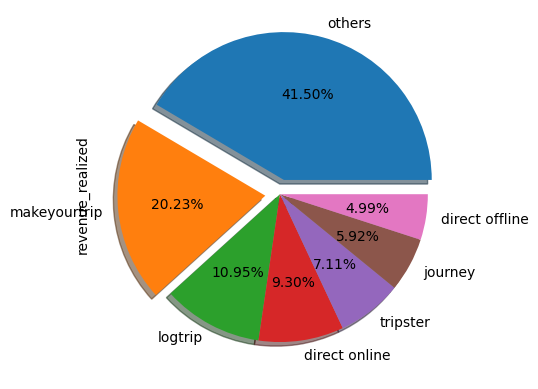

In [106]:
consolidated_table_1.groupby('booking_platform').revenue_realized.sum().sort_values(ascending = False).plot(kind = 'pie', shadow = True, autopct = '%1.2f%%', explode = (0.1,0.1,0, 0, 0, 0, 0) )